In [220]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [238]:
greve_twitter=pd.read_csv('greve_twitter_final.csv', index_col=[0])

In [239]:
greve_twitter.tweet_processed2=[x.replace("""'""",'') for x in greve_twitter.tweet_processed2]
greve_twitter.date = greve_twitter.date.map(lambda x: str(x)[:-15])
pd.options.display.max_colwidth = 50
greve_twitter.sample(5)

,polarity,date,tweet,tweet_processed,tweet_processed2
13549,negatif,2019-12-17,"Oui, ceux qui ont bossé tôt, souvent les class...",oui ceux bossé tôt souvent classes modestes lo...,oui celui bosser tôt souvent classer modeste l...
21939,positif,2019-12-13,Cinq dates clés sur la #reformedesretraites ! ...,cinq dates clés reformedesretraites retraites,cinq dater clé reformedesretraites retraiter
29999,positif,2019-12-06,"Des ministres ""triés sur le volet"" selon #RTL ...",ministres triés volet selon rtl défendre refor...,ministre trier volet selon rtl défendre reform...
1517,positif,2019-12-29,Quand les médias mainstream (donc gouvernemen...,quand médias mainstream donc gouvernementaux c...,quand média mainstream donc gouvernemental com...
19129,negatif,2019-12-16,"Delevoye a démissionné, prochaine étape, annul...",delevoye démissionné prochaine étape annulatio...,delevoye démissionner prochain étape annulatio...


In [240]:
greve_twitter.shape

(32275, 5)

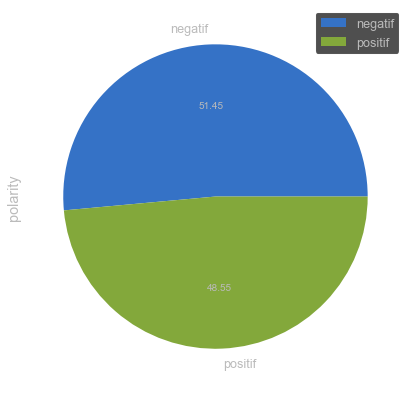

In [241]:
greve_twitter.polarity.value_counts().plot.pie(figsize=(7,7), autopct='%.2f')
plt.legend()
plt.savefig('greve_pie.png')
plt.show()


(-0.5, 799.5, 499.5, -0.5)

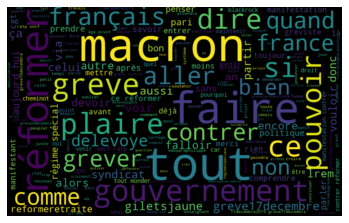

In [225]:
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110, stopwords=stopwords).generate(all_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [226]:
greve_twitter['date']= pd.to_datetime(greve_twitter['date'])

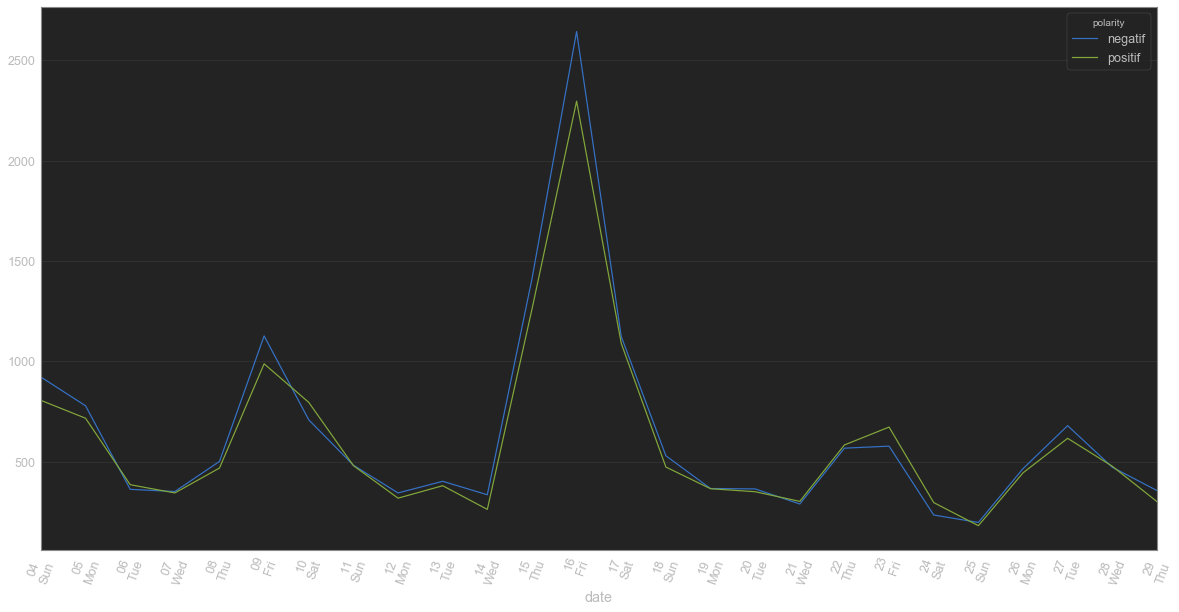

<Figure size 432x288 with 0 Axes>

In [227]:
#évolution dans le temps de l'opinion
import matplotlib.pylab as plt
import matplotlib.dates as mdates
data = greve_twitter.groupby(["date","polarity"]).size()
ax = data.unstack().plot(figsize=(20,10),rot=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%a'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d\n%a'))
plt.show()
plt.savefig('greve_temps.png')

In [228]:
#séparation des dataframes en positif et negatif
greve_negatif = greve_twitter[greve_twitter.polarity=='negatif']
greve_positif = greve_twitter[greve_twitter.polarity=='positif']

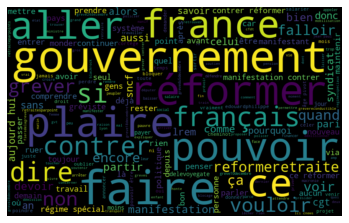

In [310]:
#df négatifs + wordcloud
text_negatif = ' '.join([x for x in greve_negatif.tweet_processed2])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110,stopwords=stopwords).generate(text_negatif)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('greve_neg_mots.png')

In [230]:
neg_word=greve_negatif.tweet_processed2.str.split(expand=True).stack().value_counts()
neg_word.head(10)

reformedesretraites    15109
retraiter               6346
macron                  2547
contrer                 2458
plaire                  2337
tout                    2314
faire                   2237
giletsjaunes            1861
réformer                1833
grevegenerale           1690
dtype: int64

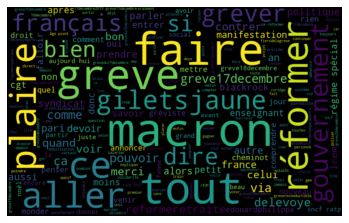

In [231]:
#df positifs + wordcloud
text_positif = ' '.join([x for x in greve_positif.tweet_processed2])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110,stopwords=stopwords).generate(text_positif)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('greve_pos_mots.png')

In [232]:
text_positifok = text_positif.split()

In [233]:
len(text_positifok)

202909

In [234]:
pos_word=greve_positif.tweet_processed2.str.split(expand=True).stack().value_counts()
pos_word.head(10)

reformedesretraites    14285
retraiter               3235
macron                  2151
giletsjaunes            1705
faire                   1682
tout                    1677
réformedesretraites     1418
grevegenerale           1402
greve                   1292
greve17decembre         1280
dtype: int64

In [235]:
import os
java_path = "C:\\Program Files (x86)\\Java\\jre1.8.0_231\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path
from nltk.tag.stanford import StanfordPOSTagger
path_to_model = "./stanford-postagger-full-2018-10-16/models/french.tagger"
path_to_jar = "./stanford-postagger-full-2018-10-16/stanford-postagger.jar"
tagger=StanfordPOSTagger(path_to_model, path_to_jar)

print(tagger.tag(sentence.split()))

[('il', 'CLS'), ('est', 'V'), ('un', 'DET'), ('test', 'NC'), ('magnifique', 'ADJ')]


In [252]:
adj_pos1 = [word for word, tags in tagger.tag(text_positif.split()[0:6999]) if tags==('ADJ')] 

In [254]:
adj_pos2 = [word for word, tags in tagger.tag(text_positif.split()[7000:13999]) if tags==('ADJ')] 

In [256]:
adj_pos3 = [word for word, tags in tagger.tag(text_positif.split()[15000:20999]) if tags==('ADJ')] 

In [257]:
adj_pos4 = [word for word, tags in tagger.tag(text_positif.split()[22000:27999]) if tags==('ADJ')] 

In [260]:
adj_pos5 = [word for word, tags in tagger.tag(text_positif.split()[28000:32999]) if tags==('ADJ')] 

In [261]:
adj_pos6 = [word for word, tags in tagger.tag(text_positif.split()[35000:40999]) if tags==('ADJ')] 

In [262]:
adj_pos7 = [word for word, tags in tagger.tag(text_positif.split()[42000:47999]) if tags==('ADJ')] 

In [263]:
adj_pos8 = [word for word, tags in tagger.tag(text_positif.split()[48000:53999]) if tags==('ADJ')] 

In [264]:
adj_pos9 = [word for word, tags in tagger.tag(text_positif.split()[55000:59999]) if tags==('ADJ')] 

In [265]:
adj_pos10 = [word for word, tags in tagger.tag(text_positif.split()[60000:64999]) if tags==('ADJ')] 

In [266]:
adj_pos11 = [word for word, tags in tagger.tag(text_positif.split()[65000:69999]) if tags==('ADJ')] 

In [267]:
adj_pos12 = [word for word, tags in tagger.tag(text_positif.split()[70000:74999]) if tags==('ADJ')] 

In [268]:
adj_pos13 = [word for word, tags in tagger.tag(text_positif.split()[75000:79999]) if tags==('ADJ')] 

In [269]:
adj_pos14 = [word for word, tags in tagger.tag(text_positif.split()[80000:84999]) if tags==('ADJ')] 

In [270]:
adj_pos15 = [word for word, tags in tagger.tag(text_positif.split()[85000:89999]) if tags==('ADJ')] 

In [271]:
adj_pos16 = [word for word, tags in tagger.tag(text_positif.split()[90000:94999]) if tags==('ADJ')] 

In [272]:
adj_pos17 = [word for word, tags in tagger.tag(text_positif.split()[95000:99999]) if tags==('ADJ')] 

In [273]:
adj_pos18 = [word for word, tags in tagger.tag(text_positif.split()[100000:104999]) if tags==('ADJ')] 

In [274]:
adj_pos19 = [word for word, tags in tagger.tag(text_positif.split()[105000:109999]) if tags==('ADJ')] 

In [275]:
adj_pos20 = [word for word, tags in tagger.tag(text_positif.split()[110000:114999]) if tags==('ADJ')] 

In [276]:
adj_pos21 = [word for word, tags in tagger.tag(text_positif.split()[115000:119999]) if tags==('ADJ')] 

In [277]:
adj_pos22 = [word for word, tags in tagger.tag(text_positif.split()[120000:124999]) if tags==('ADJ')] 

In [278]:
adj_pos23 = [word for word, tags in tagger.tag(text_positif.split()[125000:129999]) if tags==('ADJ')] 

In [279]:
adj_pos24 = [word for word, tags in tagger.tag(text_positif.split()[130000:134999]) if tags==('ADJ')] 

In [280]:
adj_pos25 = [word for word, tags in tagger.tag(text_positif.split()[160000:165999]) if tags==('ADJ')] 

In [281]:
adj_pos26 = [word for word, tags in tagger.tag(text_positif.split()[167000:171999]) if tags==('ADJ')] 

In [282]:
adj_pos27 = [word for word, tags in tagger.tag(text_positif.split()[173000:177999]) if tags==('ADJ')] 

In [287]:
adj_pos28 = [word for word, tags in tagger.tag(text_positif.split()[198000:-1]) if tags==('ADJ')] 

In [304]:
adj_pos = adj_pos1+adj_pos2+adj_pos3+adj_pos4+adj_pos5+adj_pos6+adj_pos7+adj_pos8+adj_pos9+adj_pos10+adj_pos11+adj_pos12+adj_pos13+adj_pos14+adj_pos15+adj_pos16+adj_pos17+adj_pos18+adj_pos19+adj_pos20+adj_pos21+adj_pos22+adj_pos23+adj_pos24+adj_pos25+adj_pos26+adj_pos27+adj_pos28


In [305]:
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale','giletsjaunes','greve17decembre','17decembre2019','noël','ratp','greve','macron','autre','delevoye','grevedu17decembre','tout']

In [306]:
for word in adj_pos:
    if word in stopwords:
        adj_pos.remove(word)

In [307]:
import nltk
df=pd.DataFrame.from_dict(nltk.FreqDist(adj_pos),orient='index')
df = df.sort_values(by=0, ascending=False).reset_index()
df.columns=['mot','freq']
df.head(10)

,mot,freq
0,français,487
1,bon,479
2,reformedesretraites,383
3,grand,331
4,social,314
5,gréviste,274
6,france,258
7,nouveau,247
8,petit,238
9,grevegenerale,230


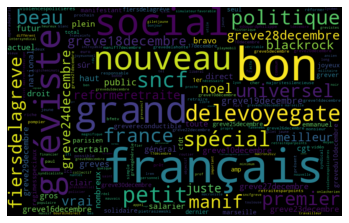

In [309]:
adj_pos = ' '.join(adj_pos)
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110,stopwords=stopwords).generate(adj_pos)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('greve_pos_mots.png')